<h1 style="text-align: center;">Tim "Poslednji ispit" - University of Kragujevac</h1>

<p style="text-align: center;">
  <img src="logopmfy.png" alt="University of Kragujevac Logo" width="200" height="200">
</p>

<h2 style="text-align: center;">Team Members</h2>

<ul style="list-style-type: none; text-align: center;">
  <li><strong>Vuk Lazović</strong></li>
  <li><strong>Sara Velimirović</strong></li>
  <li><strong>Mihajlo Janković</strong></li>
</ul>


# Predstavljanje problema i motivacija

Predviđanje cena automobila ima značajnu vrednost kako za kupce, tako i za prodavce. Sa stanovišta kupaca, tačna predviđanja cena mogu im pomoći da donesu bolje informisane odluke, izbegnu preplate i identifikuju najbolje ponude. Prodavci, s druge strane, mogu koristiti ova predviđanja kako bi optimizovali svoje cene, postavili konkurentne cene i povećali šanse za bržu prodaju. Takođe, predviđanje cena može pomoći i investitorima i analitičarima u prepoznavanju tržišnih trendova i prilika za ulaganje. Odabrali smo ovaj problem zbog njegove praktične primene i mogućnosti da razvijemo modele mašinskog učenja koji mogu biti korisni u stvarnom svetu. Ovaj projekat pruža priliku da se analiziraju faktori koji najviše utiču na cenu vozila, kao što su godine proizvodnje, marka, model, kilometraža i stanje, čime se može doprineti boljem razumevanju tržišta polovnih automobila.

## Učitavanje podataka

In [1]:
# pip install -r requirements.txt

U ovom koraku proveravamo da li je dataset, odnosno fajl "vehicles.csv", već preuzet i nalazi se u radnom direktorijumu. Funkcija *check_dataset* pretražuje sve fajlove u trenutnom direktorijumu i proverava da li se fajl sa ovim imenom već nalazi tu. Ako fajl nije pronađen, pokreće se funkcija *download*, koja preuzima dataset sa interneta. Preuzimanje se obavlja u **segmentima (chunkovima)** kako bi proces bio efikasniji i omogućen je napredak preuzimanja koristeći *tqdm* za prikazivanje napretka. Ako je fajl već preuzet, korisnik će biti obavešten da je dataset već dostupan i preuzimanje se neće ponavljati. Ovaj korak osigurava da uvek radimo sa potrebnim podacima, a da se izbegne nepotrebno preuzimanje ako je fajl već dostupan.

In [2]:
import requests,os
from tqdm import tqdm


def check_dataset():
    files = os.listdir('.')
    flag=1
    for file in files:
        if("vehicles.csv"==file):
            flag=0
    return flag

def download():
    print("Downloading dataset.....")
    url = "https://www.dropbox.com/scl/fi/hiod02ra6fa1d5f5q7bmd/vehicles.csv?rlkey=ein4k3paqkw0ashh8njtyg6ed&st=gvyd3ohd&dl=1"
    response = requests.get(url, stream=True)
    
    # Get the total file size
    total_size = int(response.headers.get('content-length', 0))
    
    with open("vehicles.csv", mode="wb") as file:
        for chunk in tqdm(response.iter_content(chunk_size=10 * 1024), total=total_size//(10*1024), unit='KB'):
            file.write(chunk)

    response = requests.get(url, stream=True)


if(check_dataset()):
    download()
else:
    print("Dataset already downloaded")

Dataset already downloaded


Nakon što je dataset uspešno preuzet, sledeći korak je učitavanje podataka u naš radni prostor. Koristimo biblioteku **pandas** kako bismo učitali CSV fajl "vehicles.csv" i smestili podatke u *DataFrame* objekat pod nazivom df. *DataFrame* predstavlja strukturirani format podataka u obliku tabele, što nam omogućava lakšu manipulaciju, analizu i vizualizaciju podataka. Učitavanjem podataka u *DataFrame*, postavljamo osnovu za dalju analizu i pripremu podataka koja će biti neophodna za kreiranje modela za predviđanje cena automobila.

## Pregled podataka

Predstavićemo dataset i objasniti svaku varijablu.

In [3]:
import pandas as pd
df=pd.read_csv("vehicles.csv")
df

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,7301591192,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,...,NaN,sedan,NaN,https://images.craigslist.org/00o0o_iiraFnHg8q...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:31-0600
426876,7301591187,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,...,NaN,sedan,red,https://images.craigslist.org/00x0x_15sbgnxCIS...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:29-0600
426877,7301591147,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,...,NaN,hatchback,white,https://images.craigslist.org/00L0L_farM7bxnxR...,Carvana is the safer way to buy a car During t...,NaN,wy,33.779214,-84.411811,2021-04-04T03:21:17-0600
426878,7301591140,https://wyoming.craigslist.org/ctd/d/atlanta-2...,wyoming,https://wyoming.craigslist.org,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,...,NaN,sedan,silver,https://images.craigslist.org/00z0z_bKnIVGLkDT...,Carvana is the safer way to buy a car During t...,NaN,wy,33.786500,-84.445400,2021-04-04T03:21:11-0600


Dimenzije podataka: (426880, 26)

In [4]:
num_rows, num_cols = df.shape
print(f"Broj vrsta: {num_rows}")
print(f"Broj kolona: {num_cols}\n")

Broj vrsta: 426880
Broj kolona: 26



Predstavljanje kolona unutar dataset-a i objašnjenje značenja svake.

In [5]:
print(list(df.columns))

['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color', 'image_url', 'description', 'county', 'state', 'lat', 'long', 'posting_date']



1. **id** - Jedinstveni identifikator za svaki unos u datasetu.

2. **url** - URL adresa do originalnog Craigslist oglasa za vozilo.

3. **region** - Geografski region u kojem se vozilo prodaje, kao što je grad ili oblast.

4. **region_url** - URL adresa Craigslist stranice za određeni region.

5. **price** - Cena vozila navedena u oglasu. Ovo je ciljna promenljiva koju želimo da predviđamo.

6. **year** - Godina proizvodnje vozila.

7. **manufacturer** - Proizvođač vozila, kao što su Ford, Toyota, Honda, itd.

8. **model** - Specifičan model vozila, npr. Camry, F-150, Civic.

9. **condition** - Stanje vozila prema navodima prodavca, npr. new (novo), like new (kao novo), excellent (odlično), good (dobro), fair (zadovoljavajuće), salvage (oštećeno).

10. **cylinders** - Broj cilindara motora vozila, npr. 4 cylinders, 6 cylinders, 8 cylinders.

11. **fuel** - Tip goriva koje vozilo koristi, npr. gas (benzin), diesel (dizel), hybrid (hibrid), electric (električni), other (drugo).

12. **odometer** - Pređena kilometraža vozila (odometar) izražena u miljama.

13. **title_status** - Status vlasničkog lista (naslov vozila), npr. clean (čist), salvage (oštećen), rebuilt (restauriran), lien (teret), missing (nedostaje), parts only (samo za delove).

14. **transmission** - Vrsta menjača u vozilu, npr. automatic (automatski), manual (ručni), other (drugo).

15. **VIN** - Jedinstveni identifikacioni broj vozila (Vehicle Identification Number).

16. **drive** - Pogonska konfiguracija vozila, npr. 4wd (četiri točka), fwd (prednji pogon), rwd (zadnji pogon).

17. **size** - Veličina vozila, npr. compact (kompaktno), full-size (pune veličine), mid-size (srednje veličine).

18. **type** - Tip vozila, npr. sedan, SUV, truck, coupe, van, wagon.

19. **paint_color** - Boja vozila prema navodima prodavca.

20. **image_url** - URL adresa do slike vozila iz oglasa.

21. **description** - Tekstualni opis vozila iz oglasa.

22. **county** - Okrug u kojem se vozilo prodaje (može biti prazan u mnogim slučajevima).

23. **state** - Američka savezna država u kojoj se vozilo prodaje, npr. CA, TX, NY.

24. **lat** - Geografska širina lokacije vozila (latitude).

25. **long** - Geografska dužina lokacije vozila (longitude).

26. **posting_date** - Datum kada je oglas za vozilo postavljen na Craigslist.

Izvršićemo grubi pregled dataset-a na osnovnu povratne vrednosti funckije *info*.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

1. **Popunjenost podataka**:

Većina kolona ima visoku popunjenost, što znači da su podaci u velikoj meri dostupni za analizu. Kolone poput *id*, *url*, *region*, *price*, *state*, *image_url*, i *posting_date* imaju gotovo sve unose popunjene. <br>
Neke kolone imaju značajan broj nedostajućih vrednosti, što će zahtevati dodatnu obradu ili imputaciju pre nego što budu korišćene u modelima. Na primer, kolone *condition*, *cylinders*, *VIN*, *drive*, *size*, i *paint_color* imaju veliki broj nedostajućih podataka. <br>
Kolona *county* nema nijednu popunjenu vrednost, što ukazuje na to da bi mogla biti irelevantna za analizu i može se razmotriti za isključivanje.
<br>

2. **Tipovi podataka**:

Kolone poput *price* i *year* su numeričke (int64, float64), što je korisno za statističke analize i modeliranje. <br>
Većina drugih kolona su object tipa, što označava tekstualne podatke ili kategorije. Neke od ovih kolona, poput *manufacturer*, *model*, i *fuel*, mogu biti pretvorene u kategorije za efikasniju analizu. <br>
Geografske koordinate *(lat i long)* su u numeričkom formatu, što omogućava prostorne analize.
<br>

3. **Potencijalni izazovi**:

Nedostajući podaci u ključnim kolonama, poput *condition*, *cylinders*, i *drive*, mogu predstavljati izazov za modeliranje i zahtevaće posebnu pažnju, kao što je imputacija vrednosti ili uklanjanje nekompletnih unosa.
Kolone sa malim brojem popunjenih vrednosti, poput *county* i *size*, možda neće biti korisne za analizu i mogu se razmotriti za uklanjanje.

### Odabir kolona

Kolone koje nećemo uzimati u obzir jer nisu relevatne: <br>
- id
- url
- region_url
- VIN
- image_url
- description
- posting_date

In [7]:
df_relevant_columns = df.drop(columns=['id', 'url', 'region_url', 'VIN', 'image_url', 'description', 'posting_date'])

Takođe, u obzir nećemo uzeti sledeće kolone:
- region
- lat
- long <br>

zato što je dovoljna količina informacija obuhvaćena kolonom **state**.

In [8]:
df_relevant_columns.drop(columns=['region', 'lat', 'long'], inplace=True)

Takođe, manje relevantna kolona je i:
- paint_color <br>


In [9]:
df_relevant_columns.drop(columns=['paint_color'], inplace=True)

Pregled koliko procenata null vrednosti ima svaka kolona:

In [10]:
df_relevant_columns.isna().mean()

price           0.000000
year            0.002823
manufacturer    0.041337
model           0.012362
condition       0.407852
cylinders       0.416225
fuel            0.007058
odometer        0.010307
title_status    0.019308
transmission    0.005988
drive           0.305863
size            0.717675
type            0.217527
county          1.000000
state           0.000000
dtype: float64

Kolone koje sadrže više od 60% null vrednosti, nema smisla popunjavati vrednostima, zato što bi moglo da dođe do pristrasnosti i samim tim bi jako uticalo na tačnost modela. Te kolone ćemo ukloniti.

In [11]:
null_columns = df_relevant_columns.columns[df_relevant_columns.isnull().mean()>0.60]
df_relevant_columns.drop(columns = null_columns,axis=1,inplace=True)
list(df_relevant_columns.columns)

['price',
 'year',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'drive',
 'type',
 'state']

## !!!! NAPOMENA !!!!!
**OVO TREBA DA VIDIMO SA BRANKOM ILI SA NEKIM ?? DA LI JE BOLJE DA OVO STO IMA IZNAD 30% NEDOSTAJUCIH, DA LI JE BOLJE DA OBRISEMO TU KOLONU ILI DA OBRISEMO REDOVE KAKO BISMO REDUKOVALI BROJ NEDOSTAJUCIH VREDNOSTI.** <BR>
**MISLIM DA NE POSTOJI NACIN DA POPUNIMO TE KOLONE, JER NE ZAVISE OD NEKE DRUGE KOLONE, A AKO BI RANDOM POPUNJAVALI MISLI DA BI PREVISE DOLAZILO DO GRESKE MODELA**

*ja sam ovde obrisala redove, da bih mogla dole da nastavim da radim, ali to cemo da vidimo*
## !!!!

**ovde fali popunjavanje NA vrednosti ili brisanje u zavisnosti od potreba**

In [12]:
df_relevant_columns

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,state
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,wy
426876,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,sedan,wy
426877,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,hatchback,wy
426878,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,wy


In [13]:

# !python -m spacy download en_core_web_sm
from spacy_extractor import extract_info

i3


In [16]:
df_relevant_columns

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,state
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,23590,2019.0,nissan,maxima s sedan 4d,good,6 cylinders,gas,32226.0,clean,other,fwd,sedan,wy
426876,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,NaN,gas,12029.0,clean,other,fwd,sedan,wy
426877,34990,2020.0,cadillac,xt4 sport suv 4d,good,NaN,diesel,4174.0,clean,other,NaN,hatchback,wy
426878,28990,2018.0,lexus,es 350 sedan 4d,good,6 cylinders,gas,30112.0,clean,other,fwd,sedan,wy


In [17]:
nan_counts = df_relevant_columns.isna().sum()

# Print the number of NaN values for each column
for column, count in nan_counts.items():
    print(f'Column "{column}" has {count} NaN values.')

Column "price" has 0 NaN values.
Column "year" has 1205 NaN values.
Column "manufacturer" has 17646 NaN values.
Column "model" has 5277 NaN values.
Column "condition" has 174104 NaN values.
Column "cylinders" has 177678 NaN values.
Column "fuel" has 3013 NaN values.
Column "odometer" has 4400 NaN values.
Column "title_status" has 8242 NaN values.
Column "transmission" has 2556 NaN values.
Column "drive" has 130567 NaN values.
Column "type" has 92858 NaN values.
Column "state" has 0 NaN values.


In [18]:
df_relevant_columns['drive'].unique()

array([nan, 'rwd', '4wd', 'fwd'], dtype=object)

In [19]:
count_4wd = df[df['drive'] == '4wd'].shape[0]

print(f'The number of 4wd cars is: {count_4wd}')

The number of 4wd cars is: 131904


In [20]:
import pandas as pd
import matplotlib.pyplot as plt


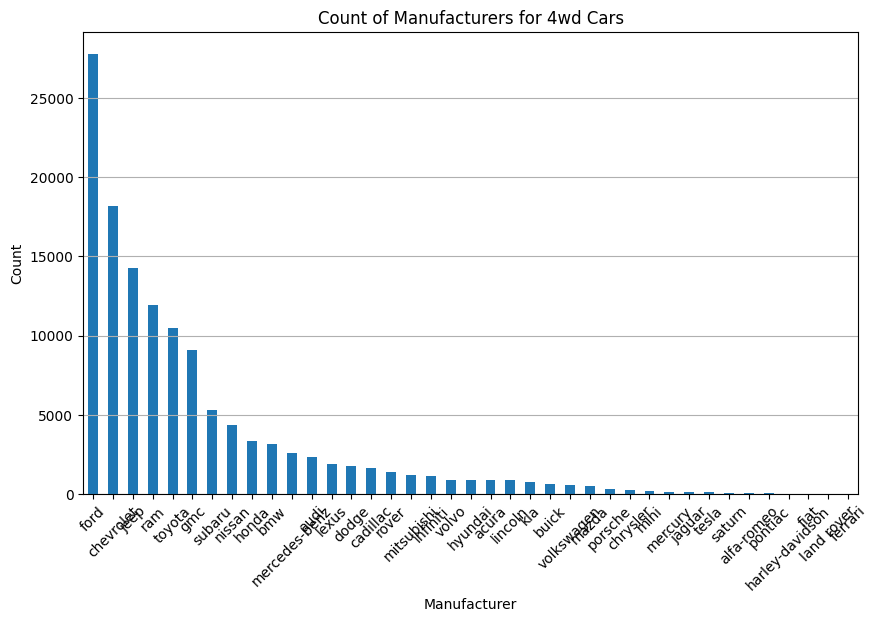

In [21]:
df_4wd = df[df['drive'] == '4wd']

# Create histogram of manufacturers for '4wd' cars
plt.figure(figsize=(10, 6))
df_4wd['manufacturer'].value_counts().plot(kind='bar')
plt.xlabel('Manufacturer')
plt.ylabel('Count')
plt.title('Count of Manufacturers for 4wd Cars')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

## Sređivanje podataka

Kolona "cilindri" u našem datasetu predstavlja ordinalnu varijablu koja sadrži stringove koji označavaju broj cilindara u automobilima. S obzirom na to da broj cilindara utiče na cenu automobila, potrebno je konvertovati ovu kolonu u numeričke vrednosti koje će omogućiti uporedive analize.

In [22]:
print(list(df_relevant_columns['cylinders'].unique()))

[nan, '8 cylinders', '6 cylinders', '4 cylinders', '5 cylinders', 'other', '3 cylinders', '10 cylinders', '12 cylinders']


Koristićemo Python biblioteku re za primenu regularnog izraza koji identifikuje i ekstraktuje brojeve iz stringova. Primer regularnog izraza za ovo može biti r'\d+'.

In [23]:
import re
def extract_number(text):
    try:
        match = re.search(r'\d+', text)
        return int(match.group()) if match else None
    except :
        return None


df_relevant_columns['cylinder_count'] = df_relevant_columns['cylinders'].apply(extract_number)
df_relevant_columns.drop('cylinders',inplace=True,axis=1)

Kolina contion sadrži vrednosti i stanju automobila, vrednosti možemo pretvoriti u brojčane vrednosti kako bi model lakše uporedio vrednosti i kako bi redukovali dimenzijalnost dataseta.

In [24]:
nan_counts = df_relevant_columns['cylinder_count'].isna().sum()
print(nan_counts)

178976


Obziorom na to da imamo 178769 NaN vrednosti za cylinder_count pozeljno bi bilo da popunimo prazne vrednosti zato sto je broj cilindra bitan faktor za cenu automobila.
Za potrebe popunjava NaN vrednosti, treniracemo pomoćni model koji će na osnovu proizvodjaca, modela, godista i cene na prediktuje broj cilindra.

In [25]:
df_cylinder_unknown = df_relevant_columns[df_relevant_columns['cylinder_count'].isna()]

df_cylinder_known = df_relevant_columns[df_relevant_columns['cylinder_count'].notna()]


display(df_cylinder_unknown)
display(df_cylinder_known)

,price,year,manufacturer,model,condition,fuel,odometer,title_status,transmission,drive,type,state,cylinder_count
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426872,32590,2020.0,mercedes-benz,c-class c 300,good,gas,19059.0,clean,other,rwd,sedan,wy,NaN
426873,30990,2018.0,mercedes-benz,glc 300 sport,good,gas,15080.0,clean,automatic,rwd,other,wy,NaN
426876,30590,2020.0,volvo,s60 t5 momentum sedan 4d,good,gas,12029.0,clean,other,fwd,sedan,wy,NaN
426877,34990,2020.0,cadillac,xt4 sport suv 4d,good,diesel,4174.0,clean,other,NaN,hatchback,wy,NaN


,price,year,manufacturer,model,condition,fuel,odometer,title_status,transmission,drive,type,state,cylinder_count
27,33590,2014.0,gmc,sierra 1500 crew cab slt,good,gas,57923.0,clean,other,NaN,pickup,al,8.0
28,22590,2010.0,chevrolet,silverado 1500,good,gas,71229.0,clean,other,NaN,pickup,al,8.0
29,39590,2020.0,chevrolet,silverado 1500 crew,good,gas,19160.0,clean,other,NaN,pickup,al,8.0
30,30990,2017.0,toyota,tundra double cab sr,good,gas,41124.0,clean,other,NaN,pickup,al,8.0
31,15000,2013.0,ford,f-150 xlt,excellent,gas,128000.0,clean,automatic,rwd,truck,al,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426866,32990,2016.0,infiniti,qx80 sport utility 4d,good,gas,55612.0,clean,automatic,rwd,other,wy,8.0
426868,0,2010.0,toyota,venza,excellent,gas,155000.0,clean,automatic,4wd,NaN,wy,6.0
426874,33590,2018.0,lexus,gs 350 sedan 4d,good,gas,30814.0,clean,automatic,rwd,sedan,wy,6.0
426875,23590,2019.0,nissan,maxima s sedan 4d,good,gas,32226.0,clean,other,fwd,sedan,wy,6.0


In [26]:
df_encoded = pd.get_dummies(df_cylinder_known, columns=['manufacturer'])


In [27]:
columns_to_keep = ['price', 'year', 'cylinder_count'] + [col for col in df_encoded.columns if  'manufacturer_' in col]


In [28]:
df_prepared = df_encoded[columns_to_keep]


In [29]:
df_prepared

,price,year,cylinder_count,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,...,manufacturer_pontiac,manufacturer_porsche,manufacturer_ram,manufacturer_rover,manufacturer_saturn,manufacturer_subaru,manufacturer_tesla,manufacturer_toyota,manufacturer_volkswagen,manufacturer_volvo
27,33590,2014.0,8.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
28,22590,2010.0,8.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29,39590,2020.0,8.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
30,30990,2017.0,8.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
31,15000,2013.0,6.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426866,32990,2016.0,8.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
426868,0,2010.0,6.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
426874,33590,2018.0,6.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
426875,23590,2019.0,6.0,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df_prepared is the DataFrame prepared earlier

# Define features (X) and target (y)
X = df_prepared.drop('cylinder_count', axis=1)
y = df_prepared['cylinder_count']

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Train the model
rf_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R² Score: {r2}")


Mean Squared Error: 0.8467504048769628
R² Score: 0.6723161410516472


In [31]:
len(y_pred)==len(y_test)
for i,j in zip(y_pred,y_test):
    print(f"actual {i}, predicted {j}")

actual 6.0, predicted 8.0
actual 8.0, predicted 8.0
actual 8.0, predicted 8.0
actual 5.32, predicted 6.0
actual 6.0, predicted 6.0
actual 6.34, predicted 6.0
actual 4.0263333333333335, predicted 6.0
actual 4.0, predicted 4.0
actual 3.9431428571428575, predicted 4.0
actual 4.02, predicted 4.0
actual 5.158666666666665, predicted 6.0
actual 4.689111111111111, predicted 6.0
actual 5.995, predicted 6.0
actual 6.491282825601506, predicted 8.0
actual 4.04, predicted 8.0
actual 6.149052104899932, predicted 8.0
actual 4.477042412557761, predicted 6.0
actual 6.83195238095238, predicted 6.0
actual 4.510873015873016, predicted 4.0
actual 5.27, predicted 4.0
actual 8.0, predicted 8.0
actual 7.62, predicted 8.0
actual 6.0, predicted 6.0
actual 4.66, predicted 4.0
actual 8.0, predicted 8.0
actual 5.823333333333334, predicted 6.0
actual 5.096089268934952, predicted 6.0
actual 5.211976190476191, predicted 4.0
actual 6.0, predicted 8.0
actual 4.851738095238094, predicted 6.0
actual 7.44, predicted 8.0
a

Ovime smo uspesno napravili prediktor cilindra sto nam omogucava popunjavanje praznih mesta.

In [32]:
df_encoded = pd.get_dummies(df_cylinder_unknown, columns=['manufacturer'])
columns_to_keep = ['price', 'year', 'cylinder_count'] + [col for col in df_encoded.columns if  'manufacturer_' in col]
df_prepared = df_encoded[columns_to_keep]
to_predict = df_prepared.drop('cylinder_count', axis=1)


In [33]:
predicted_cylinders = rf_regressor.predict(to_predict)

In [34]:
df_cylinder_unknown['cylinder_count']=predicted_cylinders
df_combined = pd.concat([df_cylinder_unknown, df_cylinder_known], ignore_index=True)


/tmp/ipykernel_4123688/3701327613.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cylinder_unknown['cylinder_count']=predicted_cylinders


In [35]:
df_relevant_columns=df_combined

In [36]:
df_relevant_columns 

,price,year,manufacturer,model,condition,fuel,odometer,title_status,transmission,drive,type,state,cylinder_count
0,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az,4.864825
1,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,4.000000
2,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,4.438667
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,5.240000
4,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc,5.229048
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426875,32990,2016.0,infiniti,qx80 sport utility 4d,good,gas,55612.0,clean,automatic,rwd,other,wy,8.000000
426876,0,2010.0,toyota,venza,excellent,gas,155000.0,clean,automatic,4wd,NaN,wy,6.000000
426877,33590,2018.0,lexus,gs 350 sedan 4d,good,gas,30814.0,clean,automatic,rwd,sedan,wy,6.000000
426878,23590,2019.0,nissan,maxima s sedan 4d,good,gas,32226.0,clean,other,fwd,sedan,wy,6.000000


Ciscenje null vrednosti

In [37]:
df_relevant_columns.dropna(inplace=True)
df_relevant_columns.isna().sum()

price             0
year              0
manufacturer      0
model             0
condition         0
fuel              0
odometer          0
title_status      0
transmission      0
drive             0
type              0
state             0
cylinder_count    0
dtype: int64

In [38]:
display(df_relevant_columns)
df_relevant_columns.isna().sum()

,price,year,manufacturer,model,condition,fuel,odometer,title_status,transmission,drive,type,state,cylinder_count
27,30990,2016.0,chevrolet,colorado crew cab z71,good,other,34940.0,clean,other,4wd,pickup,al,6.000000
33,32990,2020.0,jeep,wrangler sport suv 2d,good,gas,20581.0,clean,other,4wd,SUV,al,5.868063
34,31590,2020.0,mazda,mx-5 miata club,good,gas,2195.0,clean,other,rwd,other,al,4.100000
36,31590,2019.0,cadillac,xt4 sport suv 4d,good,other,12102.0,clean,other,fwd,hatchback,al,5.860000
37,16590,2016.0,jeep,renegade sport suv 4d,good,gas,35835.0,clean,other,4wd,other,al,4.260000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426871,39990,2017.0,infiniti,qx80 sport utility 4d,good,gas,41664.0,clean,automatic,4wd,other,wy,8.000000
426875,32990,2016.0,infiniti,qx80 sport utility 4d,good,gas,55612.0,clean,automatic,rwd,other,wy,8.000000
426877,33590,2018.0,lexus,gs 350 sedan 4d,good,gas,30814.0,clean,automatic,rwd,sedan,wy,6.000000
426878,23590,2019.0,nissan,maxima s sedan 4d,good,gas,32226.0,clean,other,fwd,sedan,wy,6.000000


price             0
year              0
manufacturer      0
model             0
condition         0
fuel              0
odometer          0
title_status      0
transmission      0
drive             0
type              0
state             0
cylinder_count    0
dtype: int64

Kolone sa numeričkim podacima su **price**, **year**, **odometer**, **cylinder_count**.

Da bismo redukovali iskorišćenost memorije prebacićemo float64 u int32.

In [39]:
df_relevant_columns['price'] = df_relevant_columns['price'].astype(int)
df_relevant_columns['year'] = df_relevant_columns['year'].astype(int)
df_relevant_columns['odometer'] = df_relevant_columns['odometer'].astype(int)
df_relevant_columns['cylinder_count'] = df_relevant_columns['cylinder_count'].astype(int)

In [40]:
df_relevant_columns

,price,year,manufacturer,model,condition,fuel,odometer,title_status,transmission,drive,type,state,cylinder_count
27,30990,2016,chevrolet,colorado crew cab z71,good,other,34940,clean,other,4wd,pickup,al,6
33,32990,2020,jeep,wrangler sport suv 2d,good,gas,20581,clean,other,4wd,SUV,al,5
34,31590,2020,mazda,mx-5 miata club,good,gas,2195,clean,other,rwd,other,al,4
36,31590,2019,cadillac,xt4 sport suv 4d,good,other,12102,clean,other,fwd,hatchback,al,5
37,16590,2016,jeep,renegade sport suv 4d,good,gas,35835,clean,other,4wd,other,al,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
426871,39990,2017,infiniti,qx80 sport utility 4d,good,gas,41664,clean,automatic,4wd,other,wy,8
426875,32990,2016,infiniti,qx80 sport utility 4d,good,gas,55612,clean,automatic,rwd,other,wy,8
426877,33590,2018,lexus,gs 350 sedan 4d,good,gas,30814,clean,automatic,rwd,sedan,wy,6
426878,23590,2019,nissan,maxima s sedan 4d,good,gas,32226,clean,other,fwd,sedan,wy,6


In [61]:
def get_model(s):
    try:
        ma= extract_info(s)
        return ma["Make"]+' '+ma["Model"]
    except:
        return None


In [50]:
# k=3/0
from tqdm import tqdm
tqdm.pandas()
k=[]
list_of_makes=list(df_relevant_columns['manufacturer'])
list_of_models=list(df_relevant_columns['model'])

for make,model in tqdm(zip(list_of_makes[:20],list_of_models[:20])):
    k.append(get_model(make+' '+model))

20it [00:00, 40.18it/s]


In [62]:
def parallel_get_model(make_model):
    make, model = make_model
    return get_model(make + ' ' + model)

In [63]:
parallel_get_model(("lexu","gs 350 sedan 4d"))

'lexus gs'

In [64]:
from tqdm import tqdm
import multiprocessing as mp

# Assuming get_model is already defined
def parallel_get_model(make_model):
    make, model = make_model
    return get_model(make + ' ' + model)

if __name__ == '__main__':
    tqdm.pandas()
    k = []
    list_of_makes = list(df_relevant_columns['manufacturer'])
    list_of_models = list(df_relevant_columns['model'])

    # Combine makes and models into a list of tuples
    combined_list = list(zip(list_of_makes, list_of_models))

    # Initialize a multiprocessing pool
    num_processors = mp.cpu_count()
    with mp.Pool(num_processors) as pool:
        # Apply the function in parallel while tracking progress
        k = list(tqdm(pool.imap(parallel_get_model, combined_list), total=len(combined_list)))

    # Now 'k' contains the results in the same order as the input


100%|██████████| 161209/161209 [01:24<00:00, 1897.64it/s]


In [69]:
df_relevant_columns['extracted model']=k

27        chevrolet colorado
33             jeep wrangler
34          mazda mx-5 miata
36              cadillac xt4
37             jeep renegade
                 ...        
426871            polestar 2
426875            polestar 2
426877              lexus gs
426878         nissan maxima
426879              lexus es
Name: extracted model, Length: 161209, dtype: object

In [75]:
len(df_relevant_columns['extracted model'].unique())

887

### Čišćenje redova sa vrednostima koje nećemo koristiti za treniranje modela

##### !!!!!!!!!! NAPOMENA !!!!!!!!!!! 
**ovde treba da vidimo kako utice ovo sto imamo neuravnotezeni skup, za neku vrednost 100k redova, a za neku 600**
##### !!!!!!!!!!

#### Year ------ ovo treba da izmestim

In [ ]:
value_counts = df_relevant_columns['year'].value_counts()
print(value_counts)

In [ ]:
proba = df_relevant_columns.copy()

In [ ]:
import numpy as np
import pandas as pd

proba['year_category'] = np.where(df_relevant_columns['year'] > 2015, 'new', np.where(df_relevant_columns['year'] >= 2000, 'middle', 'old'))

In [ ]:
value_counts = proba['year_category'].value_counts()
print(value_counts)

In [ ]:
import pandas as pd

years = df_relevant_columns['year'].unique()
years_series = pd.Series(years)

# kategorije i opsezi
bins = [-float('inf'), 1949, 1979, 1999, 2015, float('inf')]
labels = ['vintage', 'classic', 'modern_classic', 'recent', 'new']

# nova kolona sa kategorijama
#categories = pd.cut(years_series, bins=bins, labels=labels)
proba['age_category'] = pd.cut(proba['year'], bins=bins, labels=labels)

print(proba.head())

In [ ]:
value_counts = proba['age_category'].value_counts()
print(value_counts)

#### *Manufacturer*

In [ ]:
df_relevant_columns['manufacturer'].unique()

In [ ]:
value_counts = df_relevant_columns['manufacturer'].value_counts()
print(value_counts)

##### !!!!!!!!!! NAPOMENA !!!!!!!!!!! 
**Isto pitanje, ovde imamo tipa samo 6 ove marke, koliko moze uopste da se istrenira?**
##### !!!!!!!!!!

#### *Fuel*

In [ ]:
df_relevant_columns['fuel'].unique()

In [ ]:
value_counts = df_relevant_columns['fuel'].value_counts()
print(value_counts)

Obrisaćemo redove sa vrednosti *other*, zbog neodređenog značenja.

In [ ]:
df_filtered = df_relevant_columns[df_relevant_columns['fuel'] != 'other']

#### *Condition*

In [ ]:
df_filtered['condition'].unique()

In [ ]:
value_counts = df_filtered['condition'].value_counts()
print(value_counts)

Obrisaćemo redove sa vrednošču *salvage*, što predstavlja automobile koji su pretrpeli značajnu štetu, pa bi se verovatno koristili za prodavanje posebnih delova, a mi u obzir uzimamo samo automobile koji su u voznom stanju.

In [ ]:
df_filtered = df_filtered[df_filtered['condition'] != 'salvage']

#### *Title status*

In [ ]:
df_filtered['title_status'].unique()

In [ ]:
value_counts = df_filtered['title_status'].value_counts()

print(value_counts)

Sa obzirom da posmatramo samo automobile koji su u voznom stanju, iz dataseta brišemo redove koji sadrže vrednosti *parts_only*, *missing*, *salvage*. <br>
*Napomena*: *Missing* je auto kom pumpa za gorivo počinje da se kvari, pa se dotok goriva do motora smanjuje.

In [ ]:
df_filtered = df_filtered[~df_filtered['title_status'].isin(['parts_only', 'missing', 'salvage'])]

#### *Transmission*

In [ ]:
df_filtered['transmission'].unique()

In [ ]:
value_counts = df_filtered['transmission'].value_counts()

print(value_counts)

##### !!!!!!!!!! NAPOMENA !!!!!!!!!!! 
**Ne znam za ovo dal cemo da brisemo ovo other??**
##### !!!!!!!!!!

In [ ]:
df_filtered

#### *Type*

In [ ]:
df_filtered['type'].unique()

In [ ]:
value_counts = df_filtered['type'].value_counts()

print(value_counts)

In [ ]:
df_filtered = df_filtered[~df_filtered['type'].isin(['bus', 'other'])]

Obrisaćemo redove sa vrednostima *bus* i *other*.

### Sređivanje outlier-a

---------------------------------------------

Detaljnija analiza svake kolone posebno.

In [ ]:
import numpy as np 
import pandas as pd 
from scipy import stats

def analyze_dataframe(df, n, m):
    # Number of rows and columns
    # n - the number of most frequent values of each feature to be analyzed 
    # m - the number of characters of each value that will be displayed for
    #     each feature with the string data type, the remaining values 
    #     are replaced by "..."
    # Returns - text describing about each feature of a dataset df


    # Analyze each feature
    for feature in df.columns:
        # Check for unique non-missing values
        unique_non_na_values = df[feature].dropna().nunique()
        if unique_non_na_values == 0:
            print(f"Feature '{feature}' has no unique values - all are missing")
            print("\n")
            continue

        print(f"Feature: {feature}")

        # Data type of the feature
        dtype = df[feature].dtype
        print(f"Data type: {dtype}")

        # Number of unique values
        unique_values = df[feature].nunique()
        print(f"Number of unique values: {unique_values}")

        # Percentage of values that are np.nan, np.inf, -np.inf
        total_values = len(df[feature])
        nan_values = df[feature].isna().sum()

        if pd.api.types.is_numeric_dtype(df[feature]):
            inf_values = np.isinf(df[feature]).sum()
        else:
            inf_values = 0

        invalid_values = nan_values + inf_values
        invalid_percentage = (invalid_values / total_values) * 100
        print(f"Percentage of np.nan, np.inf, -np.inf: {invalid_percentage:.2f}%")

        # Top 12 most frequent values
        top_n_values = df[feature].value_counts().head(n)
        top_n_values_list = top_n_values.index.tolist()
        top_n_percentage = (top_n_values.sum() / total_values) * 100

        if dtype == 'object':
            top_n_values_list = [
                (str(val)[:m] + '...') if len(str(val)) > m else str(val) 
                for val in top_n_values_list
            ]

        print(f"Top {n} most frequent values ({top_n_percentage:.2f}% of all values):")
        print(top_n_values_list)

        # Additional analysis for numeric features
        if pd.api.types.is_numeric_dtype(df[feature]):
            mean_value = df[feature].mean()
            median_value = df[feature].median()
            variance_value = df[feature].var()
            std_dev_value = df[feature].std()
            quantile_25 = df[feature].quantile(0.25)
            quantile_75 = df[feature].quantile(0.75)
            min_value = df[feature].min()
            max_value = df[feature].max()

            print("Numeric characteristics:")
            print(f"Mean: {mean_value}")
            print(f"Median: {median_value}")
            print(f"Variance: {variance_value}")
            print(f"Standard deviation: {std_dev_value}")
            print(f"1st quartile (25%): {quantile_25}")
            print(f"3rd quartile (75%): {quantile_75}")
            print(f"Minimum value: {min_value}")
            print(f"Maximum value: {max_value}")

            # Check for normal distribution
            k2, p = stats.normaltest(df[feature].dropna())
            alpha = 1e-3
            if p < alpha:  # null hypothesis: x comes from a normal distribution
                print("Not normal distribution")
            else:
                print("Normal distribution")

        print("\n")

In [ ]:
analyze_dataframe(df, 12, 20)

In [ ]:
df['year'].unique()

# Priprema podataka

In [ ]:
dfz=df[['year','manufacturer','model','odometer','price']].dropna()[:10000]

In [ ]:
df['manufacturer']

In [ ]:
print(df.describe())
bmw = df[df['manufacturer'] == 'bmw']



In [ ]:
dfz=bmw[['year','manufacturer','model','odometer','price']].dropna()

In [ ]:
len(dfz)

In [ ]:
from sklearn.model_selection import train_test_split

df_encoded = pd.get_dummies(dfz, columns=['manufacturer','model'])
y=df_encoded['price']
x=df_encoded.drop('price', axis=1)
train_df, test_df = train_test_split(x, test_size=0.2, random_state=42)
train_y, test_y = train_test_split(y, test_size=0.2, random_state=42)


In [ ]:
test_y

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Create a Random Forest regressor
rf_regressor = RandomForestRegressor(n_estimators= 100, random_state=42)

# Train the model
rf_regressor.fit(train_df, train_y)

# Make predictions on the test set
y_pred = rf_regressor.predict(test_df)

# Calculate Mean Squared Error
mse = mean_squared_error(test_y, y_pred)
print(f"Mean Squared Error: {mse:.2f}")

# Calculate R-squared
r2 = r2_score(test_y, y_pred)
print(f"R-squared: {r2:.2f}")


In [ ]:
for i,j in zip(test_y,y_pred):
    print(f"actual : {i}\t predicted : {j}")

# Analiza

# Selekcija (vuk)

# Modeli mašinsko učenja

## Resampling (sara)

## F-regression (sara)

## Decision Tree (mixi)

## Random forest (mixi)

## Neuronske mreže (vuk)

# Zaključak (sara)

# Literatura (sara)

 ## https://chatgpt.com/

In [ ]:
pip freeze > requirements.txt